<a href="https://colab.research.google.com/github/clarkde5/ai-knowledge-hub/blob/main/examples/supervised/regression/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

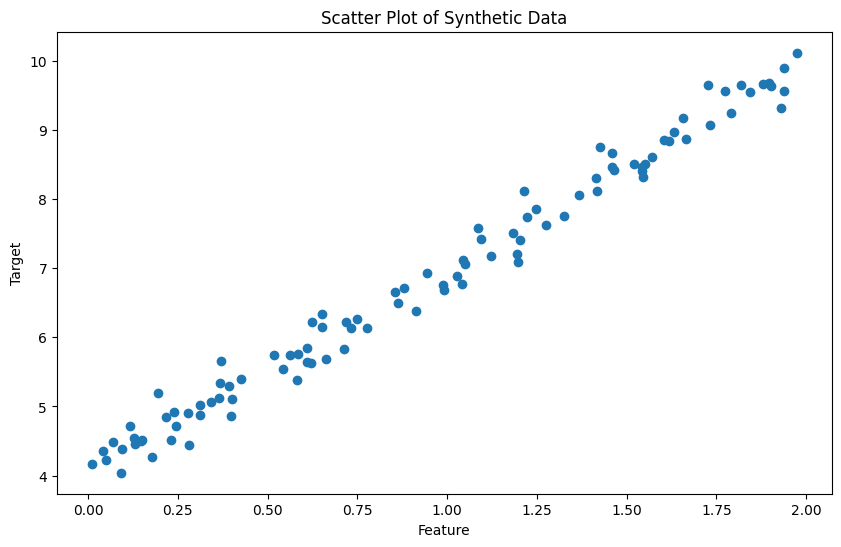

In [67]:
# Set sample size, noise factor, and a random seed for reproducibility
sample_size = 100
noise_factor = .25
np.random.seed(42)

# Generate synthetic data
X = 2 * np.random.rand(sample_size, 1)  # 100 samples, 1 feature
y = 4 + 3 * X + noise_factor * np.random.randn(sample_size, 1)  # Linear relation with noise

# Create a DataFrame for convenience
data = pd.DataFrame(data=np.hstack((X, y)), columns=['Feature', 'Target'])

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(data['Feature'], data['Target'])
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Scatter Plot of Synthetic Data')
plt.show()

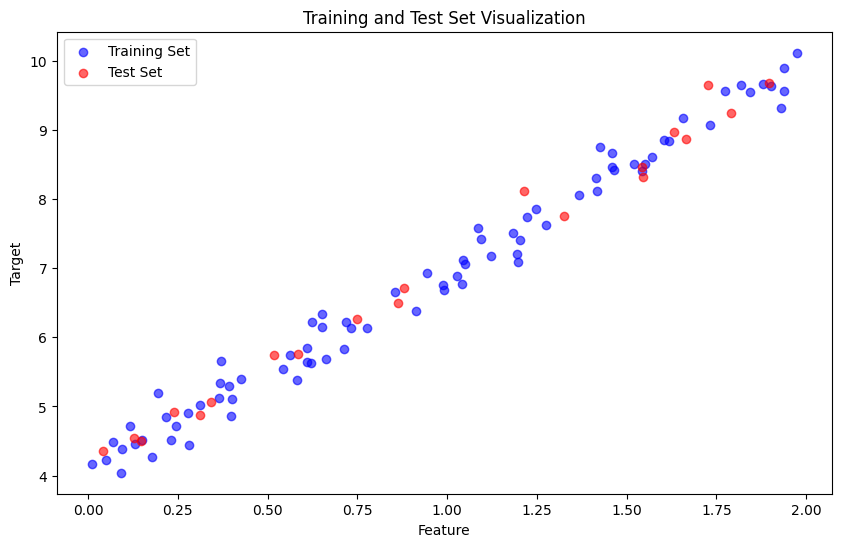

In [68]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[['Feature']], data['Target'], test_size=0.2, random_state=42)

# Combine the training and test sets for visualization
train_data = pd.DataFrame(data=np.hstack((X_train, y_train.values.reshape(-1, 1))), columns=['Feature', 'Target'])
test_data = pd.DataFrame(data=np.hstack((X_test, y_test.values.reshape(-1, 1))), columns=['Feature', 'Target'])

# Plot the training and test sets
plt.figure(figsize=(10, 6))
plt.scatter(train_data['Feature'], train_data['Target'], color='blue', label='Training Set', alpha=0.6)
plt.scatter(test_data['Feature'], test_data['Target'], color='red', label='Test Set', alpha=0.6)
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Training and Test Set Visualization')
plt.legend()
plt.show()

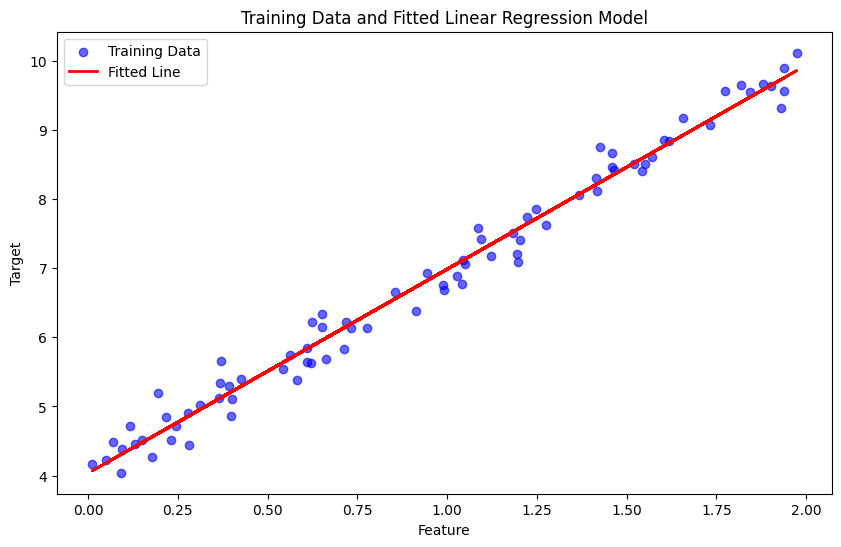

y = 2.95 * x + 4.04


In [69]:
# Create a Linear Regression model
model = LinearRegression()

# Fit the model on training data
model.fit(X_train, y_train)

# Generate predictions for the training set
y_train_pred = model.predict(X_train)

# Plot the training data and the linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data', alpha=0.6)
plt.plot(X_train, y_train_pred, color='red', label='Fitted Line', linewidth=2)
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Training Data and Fitted Linear Regression Model')
plt.legend()
plt.show()

# Display the equation
print(f'y = {model.coef_[0]:.2f} * x + {model.intercept_:.2f}')


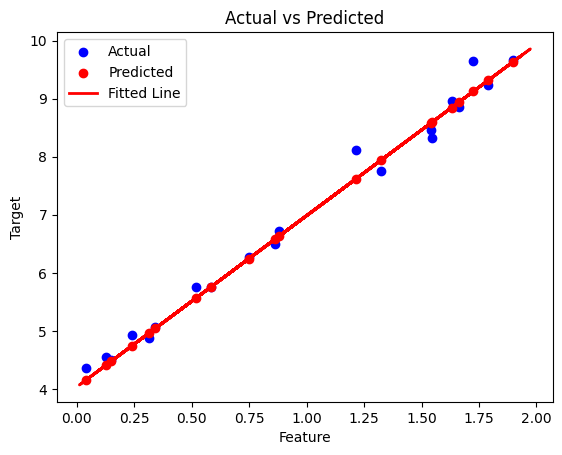

Mean Squared Error: 0.04085621960731254
R² Score: 0.9879579534356216


In [70]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Plot the results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.plot(X_train, y_train_pred, color='red', label='Fitted Line', linewidth=2)
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')
